In [1]:
# 2/25/2019 
# Predecting Evictions 

import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 

In [2]:
# load datasets 
evict = pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_values_capstone.csv')
labels= pd.read_csv('C:/Users/josh/Desktop/python_datasets/train_labels_capstone.csv')

In [3]:
# size of data
evict.shape

(2546, 48)

In [4]:
evict.year.value_counts()

b    1279
a    1267
Name: year, dtype: int64

In [5]:
# data quality 
print(evict.isnull().sum())
print(labels.isnull().sum())

row_id                                           0
county_code                                      0
year                                             0
state                                            0
population                                       0
renter_occupied_households                       0
pct_renter_occupied                              0
median_gross_rent                                0
median_household_income                          2
median_property_value                            2
rent_burden                                      0
pct_white                                        0
pct_af_am                                        0
pct_hispanic                                     0
pct_am_ind                                       0
pct_asian                                        0
pct_nh_pi                                        0
pct_multiple                                     0
pct_other                                        0
poverty_rate                   

In [6]:
# data exploration 
evict.head(1)

row_id county_code year    state  population  renter_occupied_households  \
0       0     a4e2211    b  d725a95     45009.0                      6944.0   

   pct_renter_occupied  median_gross_rent  median_household_income  \
0               37.218              643.0                  33315.0   

   median_property_value        ...          pop_per_primary_care_physician  \
0                98494.0        ...                                  1960.0   

   pct_female  pct_below_18_years_of_age  pct_aged_65_years_and_older  \
0       0.532                      0.252                        0.153   

   pct_adults_less_than_a_high_school_diploma  \
0                                       0.233   

   pct_adults_with_high_school_diploma  pct_adults_with_some_college  \
0                                0.375                         0.278   

   pct_adults_bachelors_or_higher  birth_rate_per_1k  death_rate_per_1k  
0                           0.114          12.915129          11.205112  

[1 rows x 48 columns]

In [7]:
# data exploration 
labels.head(5)

row_id  evictions
0       0        681
1       1          0
2       2         29
3       3        841
4       4          2

In [8]:
# column names 
evict.columns

Index(['row_id', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_sc

In [9]:
# number of column s
len(evict.columns)

48

In [10]:
# look for duplicates 
print(len(evict))
print(evict.row_id.nunique())

2546
2546


In [11]:
# data types 
evict.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                   

In [12]:
# Categorical value counts - country_code 
evict['county_code'].value_counts(dropna = False)

736e3bf    2
5fa91cd    2
2477bb3    2
a637349    2
7ac9621    2
8a7a0b7    2
d72dda3    2
e55425b    2
2085c5f    2
85cb419    2
520417b    2
d50e3ed    2
609bd45    2
6f1b711    2
84a0301    2
0a453b1    2
eaa7cb3    2
adf91fd    2
70d1f35    2
34e85ab    2
fa5fdcb    2
bbe8667    2
657b755    2
f85d9b7    2
a34546b    2
ed880b3    2
b79f065    2
2758867    2
4cc1571    2
b4c2531    2
          ..
821a955    1
5c10663    1
4e60593    1
eccaac3    1
7cd13a9    1
045b935    1
a72e40f    1
ebfd97b    1
45f7fcd    1
2ae1091    1
1713063    1
dea3ec3    1
e8c0241    1
7db8d31    1
9c81ee3    1
179566d    1
1c29edd    1
99b35d3    1
9a2da11    1
2285e95    1
23297bd    1
86cf7dd    1
083865f    1
345996f    1
e5acf8b    1
ce04b77    1
a4f5439    1
cd5a01b    1
723e9b9    1
d1226a7    1
Name: county_code, Length: 1296, dtype: int64

In [13]:
# Categorical value counts - year
evict['year'].value_counts(dropna = False)

b    1279
a    1267
Name: year, dtype: int64

In [14]:
# Categorical value counts - state
evict['state'].value_counts(dropna = False)

930f257    228
dc52510    137
9759812    123
f93b51e    110
f2c60ec    100
533155c     96
f723d72     94
d725a95     94
56f170e     92
2af7250     90
26926ff     88
a8981de     85
a972798     85
92a2585     80
37520b7     79
f02e4c4     72
c8ee9c4     71
3c7c507     70
105ac14     68
8af7339     62
f1f4f42     61
429dafa     60
408e6ed     58
720fc77     46
bf46354     39
6f7cad6     34
bd5a09a     34
c47295b     32
d897010     30
e159269     29
ea48b30     26
b5e230e     26
be99678     25
9cfd721     24
7c920dc     20
ad42790     18
0df5b61     16
638a64a     12
7991172      8
e602fb0      6
a7fb65d      6
de1c9a5      4
c79e512      4
4a85da6      3
9216eca      1
Name: state, dtype: int64

In [15]:
 # number or states represented in the data 
print(len(evict['state'].value_counts(dropna = False)))

# another way to count the number or states represented 
print(evict['state'].nunique())

45
45


In [16]:
# Categorical value counts - rucc 
evict['rucc'].value_counts(dropna = False)

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         466
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    370
Metro - Counties in metro areas of 1 million population or more                                  358
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     337
Metro - Counties in metro areas of 250,000 to 1 million population                               289
Metro - Counties in metro areas of fewer than 250,000 population                                 261
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        210
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          170
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       85
Name: rucc, dtype: int64

In [17]:
# Categorical value counts - urban_influence 
evict['urban_influence'].value_counts(dropna = False)                   

Small-in a metro area with fewer than 1 million residents                                             550
Large-in a metro area with at least 1 million residents or more                                       358
Noncore adjacent to a small metro with town of at least 2,500 residents                               270
Micropolitan adjacent to a small metro area                                                           201
Micropolitan not adjacent to a metro area                                                             197
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          174
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    162
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                158
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             146
Noncore adjacent to a large metro area        

In [18]:
# categorical value counts of economic_typology feature 
evict['economic_typology'].value_counts(dropna = False)

Nonspecialized                        1024
Manufacturing-dependent                410
Farm-dependent                         360
Federal/State government-dependent     290
Recreation                             248
Mining-dependent                       214
Name: economic_typology, dtype: int64

In [19]:
# pandas options to display all the summary statistics 
pd.set_option('display.max_columns', None)

# pandas options to suppress scientific notation 
pd.options.display.float_format = '{:.2f}'.format
evict.describe().transpose()

# nice way to output a pandas data frame to excel 
#descriptive_stats = evict.describe().transpose()
#descriptive.to_excel("descriptive_stats.xlsx")


count      mean       std  \
row_id                                     2546.00   1272.50    735.11   
population                                 2546.00 106245.94 322852.00   
renter_occupied_households                 2546.00  15008.01  53333.68   
pct_renter_occupied                        2546.00     28.15      7.94   
median_gross_rent                          2546.00    688.84    183.72   
median_household_income                    2544.00  46050.60  11584.63   
median_property_value                      2544.00 129609.58  76236.61   
rent_burden                                2546.00     28.52      4.45   
pct_white                                  2546.00      0.78      0.20   
pct_af_am                                  2546.00      0.09      0.15   
pct_hispanic                               2546.00      0.09      0.14   
pct_am_ind                                 2546.00      0.01      0.05   
pct_asian                                  2546.00      0.01      0.02   
pct_nh_pi                                  2546.00      0.00      0.00   
pct_multiple                               2546.00      0.02      0.02   
pct_other                                  2546.00      0.00      0.00   
poverty_rate                               2546.00     12.37      5.65   
pct_civilian_labor                         2546.00      0.47      0.07   
pct_unemployment                           2546.00      0.06      0.02   
pct_uninsured_adults                       2546.00      0.22      0.07   
pct_uninsured_children                     2546.00      0.09      0.04   
pct_adult_obesity                          2546.00      0.31      0.04   
pct_adult_smoking                          2138.00      0.21      0.06   
pct_diabetes                               2546.00      0.11      0.02   
pct_low_birthweight                        2420.00      0.08      0.02   
pct_excessive_drinking                     1736.00      0.16      0.05   
pct_physical_inactivity                    2546.00      0.28      0.05   
air_pollution_particulate_matter_value     2545.00     11.70      1.55   
homicides_per_100k                          948.00      5.85      5.06   
motor_vehicle_crash_deaths_per_100k        2238.00     20.92     10.13   
heart_disease_mortality_per_100k           2546.00    279.71     57.15   
pop_per_dentist                            2356.00   3504.29   2635.39   
pop_per_primary_care_physician             2371.00   2587.70   2216.15   
pct_female                                 2546.00      0.50      0.02   
pct_below_18_years_of_age                  2546.00      0.23      0.03   
pct_aged_65_years_and_older                2546.00      0.17      0.04   
pct_adults_less_than_a_high_school_diploma 2546.00      0.15      0.07   
pct_adults_with_high_school_diploma        2546.00      0.35      0.07   
pct_adults_with_some_college               2546.00      0.30      0.05   
pct_adults_bachelors_or_higher             2546.00      0.20      0.09   
birth_rate_per_1k                          2546.00     11.48      2.57   
death_rate_per_1k                          2546.00     10.41      2.72   

                                                min      25%       50%  \
row_id                                         0.00   636.25   1272.50   
population                                   116.00 10293.50  23863.00   
renter_occupied_households                    14.00  1052.00   2580.50   
pct_renter_occupied                            7.30    22.88     26.87   
median_gross_rent                            336.00   577.25    642.00   
median_household_income                    19328.00 38495.50  44480.00   
median_property_value                      32287.00 85288.25 108844.00   
rent_burden                                    9.99    26.05     28.78   
pct_white                                      0.05     0.66      0.86   
pct_af_am                                      0.00     0.01      0.02   
pct_hispanic                                   0

In [20]:
# Summary statistics from labels data frame 
labels.describe().transpose()

descriptive_stats = labels.describe().transpose()
descriptive_stats.to_excel("descriptive_ssadasdtats.xlsx")

In [21]:
evict.columns

Index(['row_id', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_sc

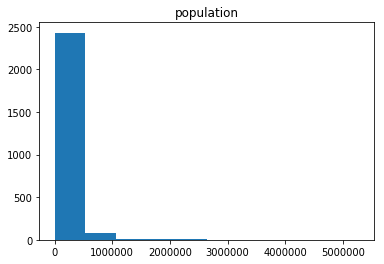

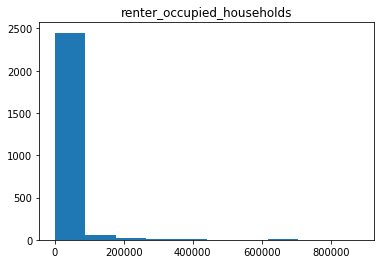

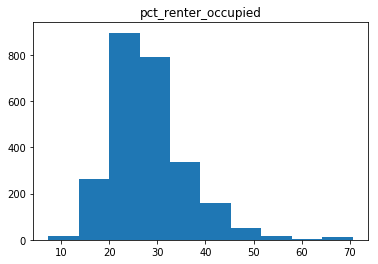

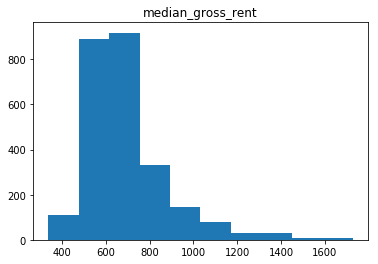

C:\Users\josh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\josh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


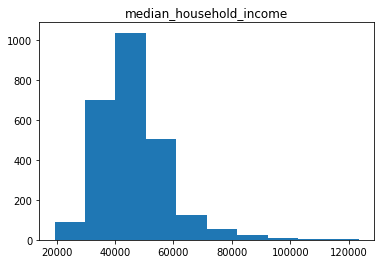

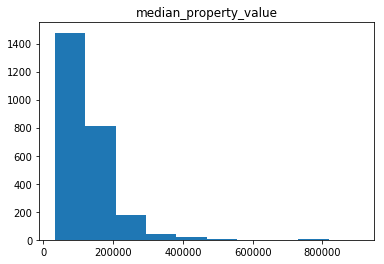

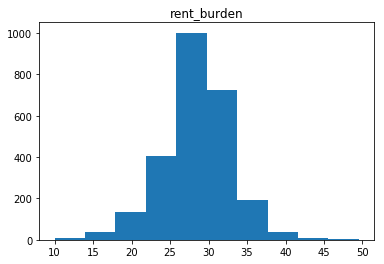

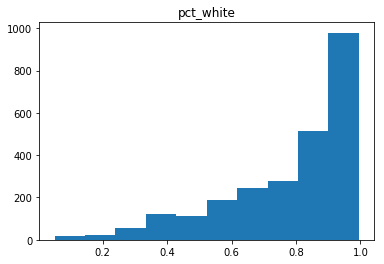

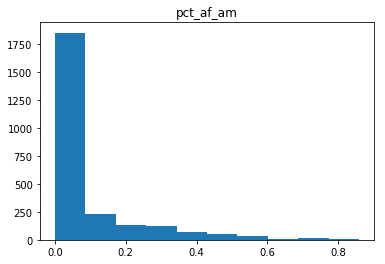

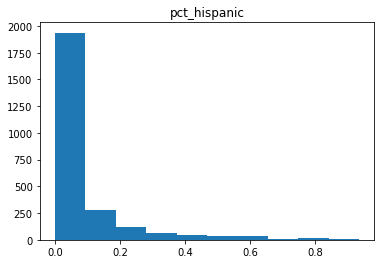

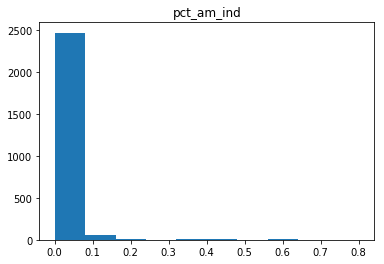

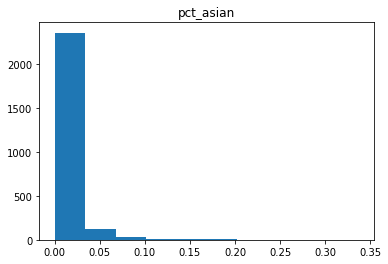

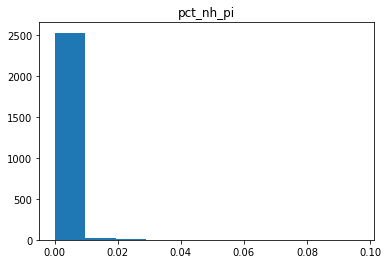

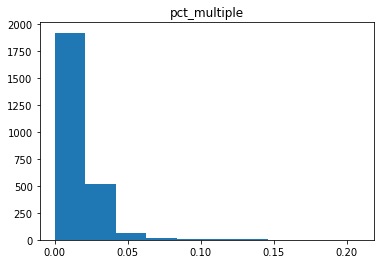

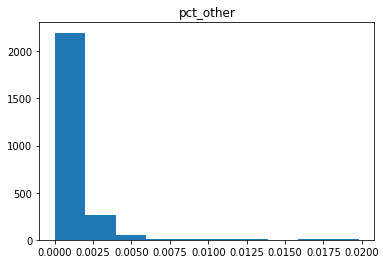

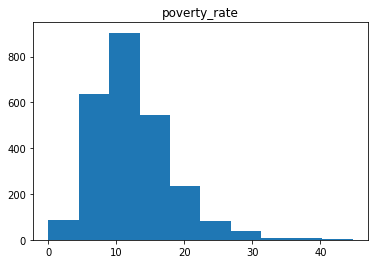

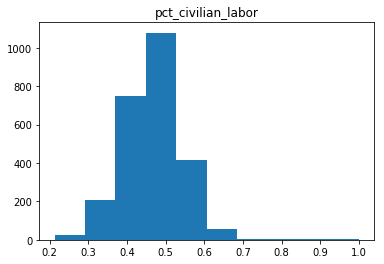

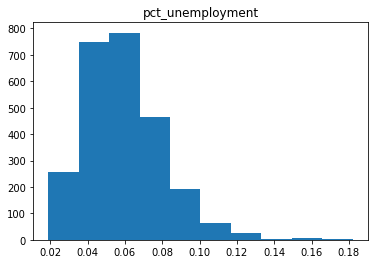

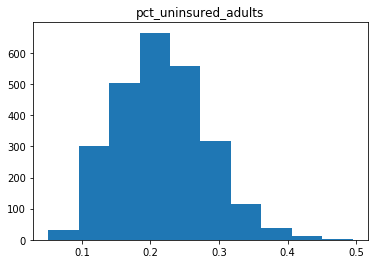

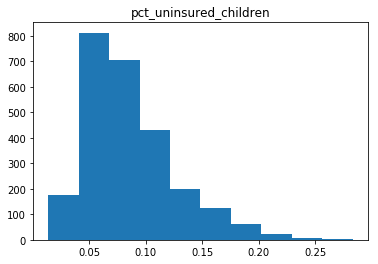

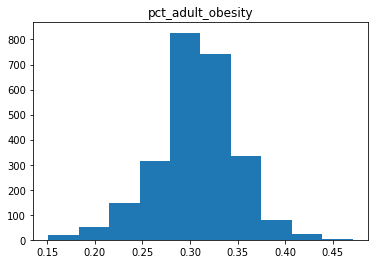

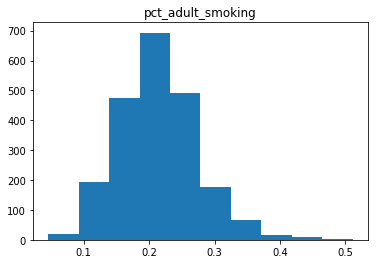

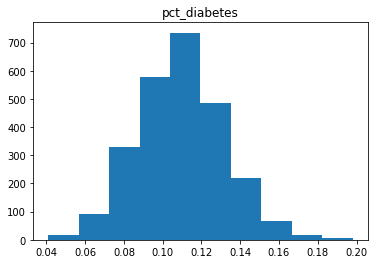

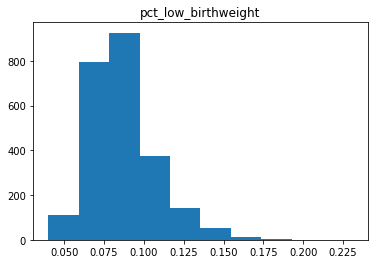

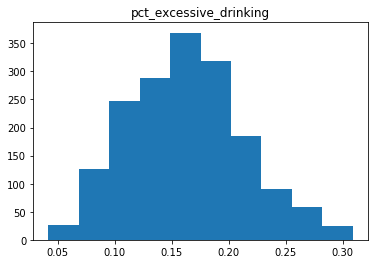

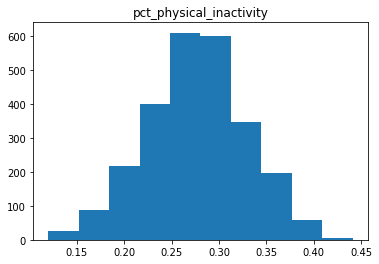

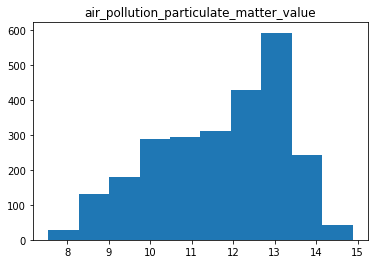

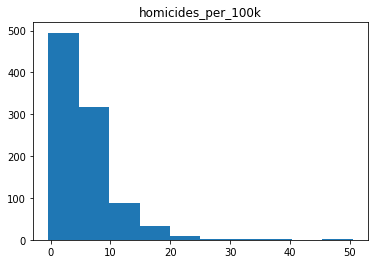

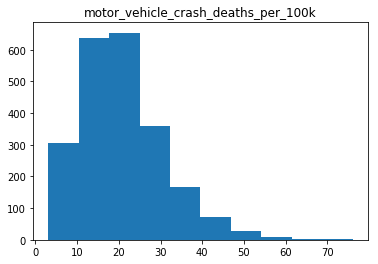

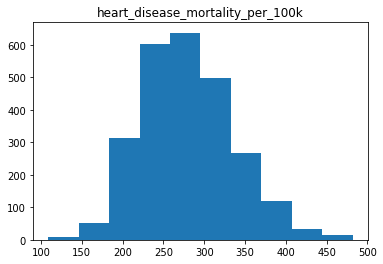

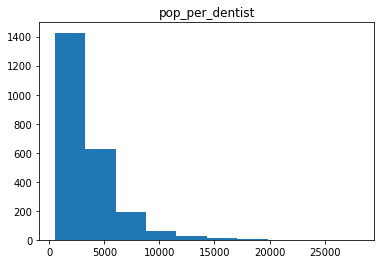

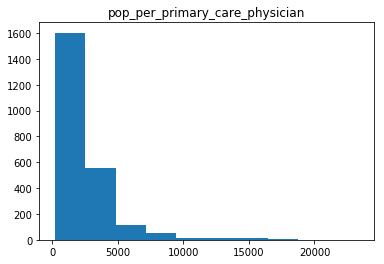

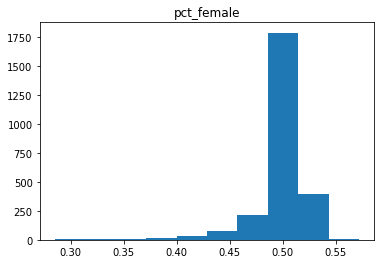

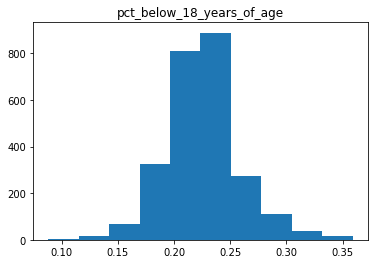

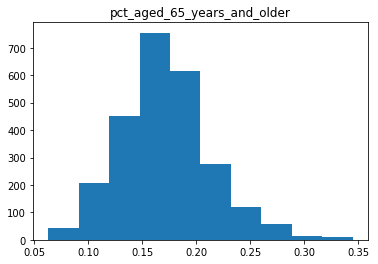

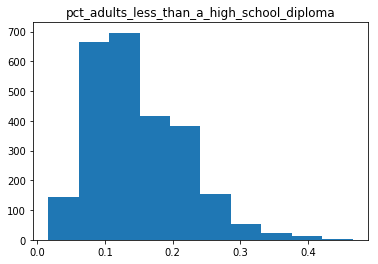

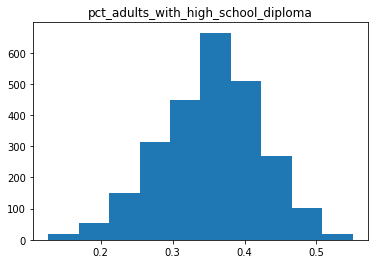

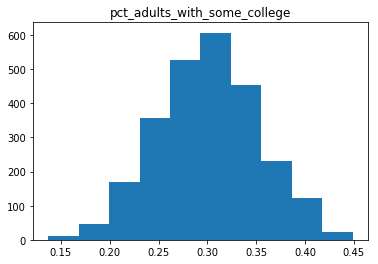

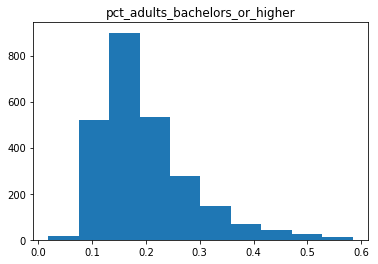

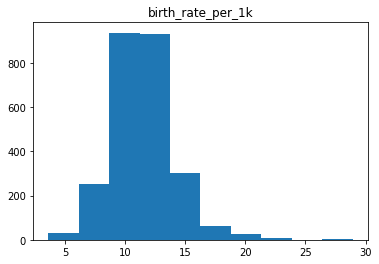

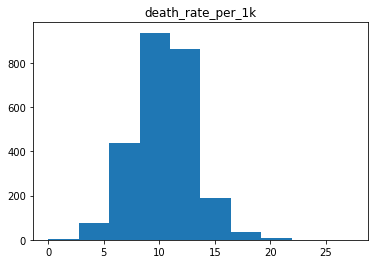

In [22]:
# loop to create histograms for all numerical features 
# categorical features will not render, thus remove from 'cols'

cols = ['population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k']

for i in cols:
    plt.hist(evict[i], bins = 10)
    plt.title(i)
    plt.show()

In [23]:
# merge data frames
alldata = pd.merge(evict, 
                  labels, 
                  right_on = 'row_id',
                  left_on = 'row_id')

C:\Users\josh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


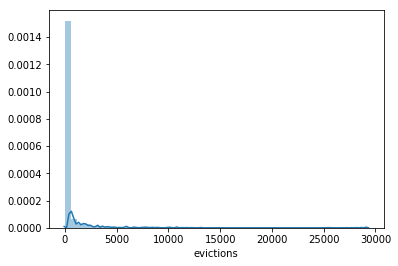

In [24]:
sns.distplot(alldata.evictions)

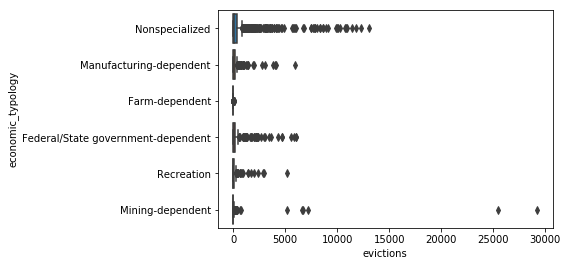

In [25]:


# boxplot - evictions vs economic_typology
sns.boxplot(x = alldata['evictions'], y = alldata['economic_typology'], order = ['Nonspecialized','Manufacturing-dependent','Farm-dependent',
                                                                                 'Federal/State government-dependent',
                                                                                 'Recreation','Mining-dependent'])

In [26]:
alldata.economic_typology.value_counts()

Nonspecialized                        1024
Manufacturing-dependent                410
Farm-dependent                         360
Federal/State government-dependent     290
Recreation                             248
Mining-dependent                       214
Name: economic_typology, dtype: int64

In [27]:
print(alldata[['economic_typology', 'evictions']].groupby('economic_typology').mean().sort_values('evictions', ascending = False))

                                    evictions
economic_typology                            
Nonspecialized                         618.35
Mining-dependent                       412.64
Federal/State government-dependent     411.50
Manufacturing-dependent                196.36
Recreation                             157.71
Farm-dependent                           5.72


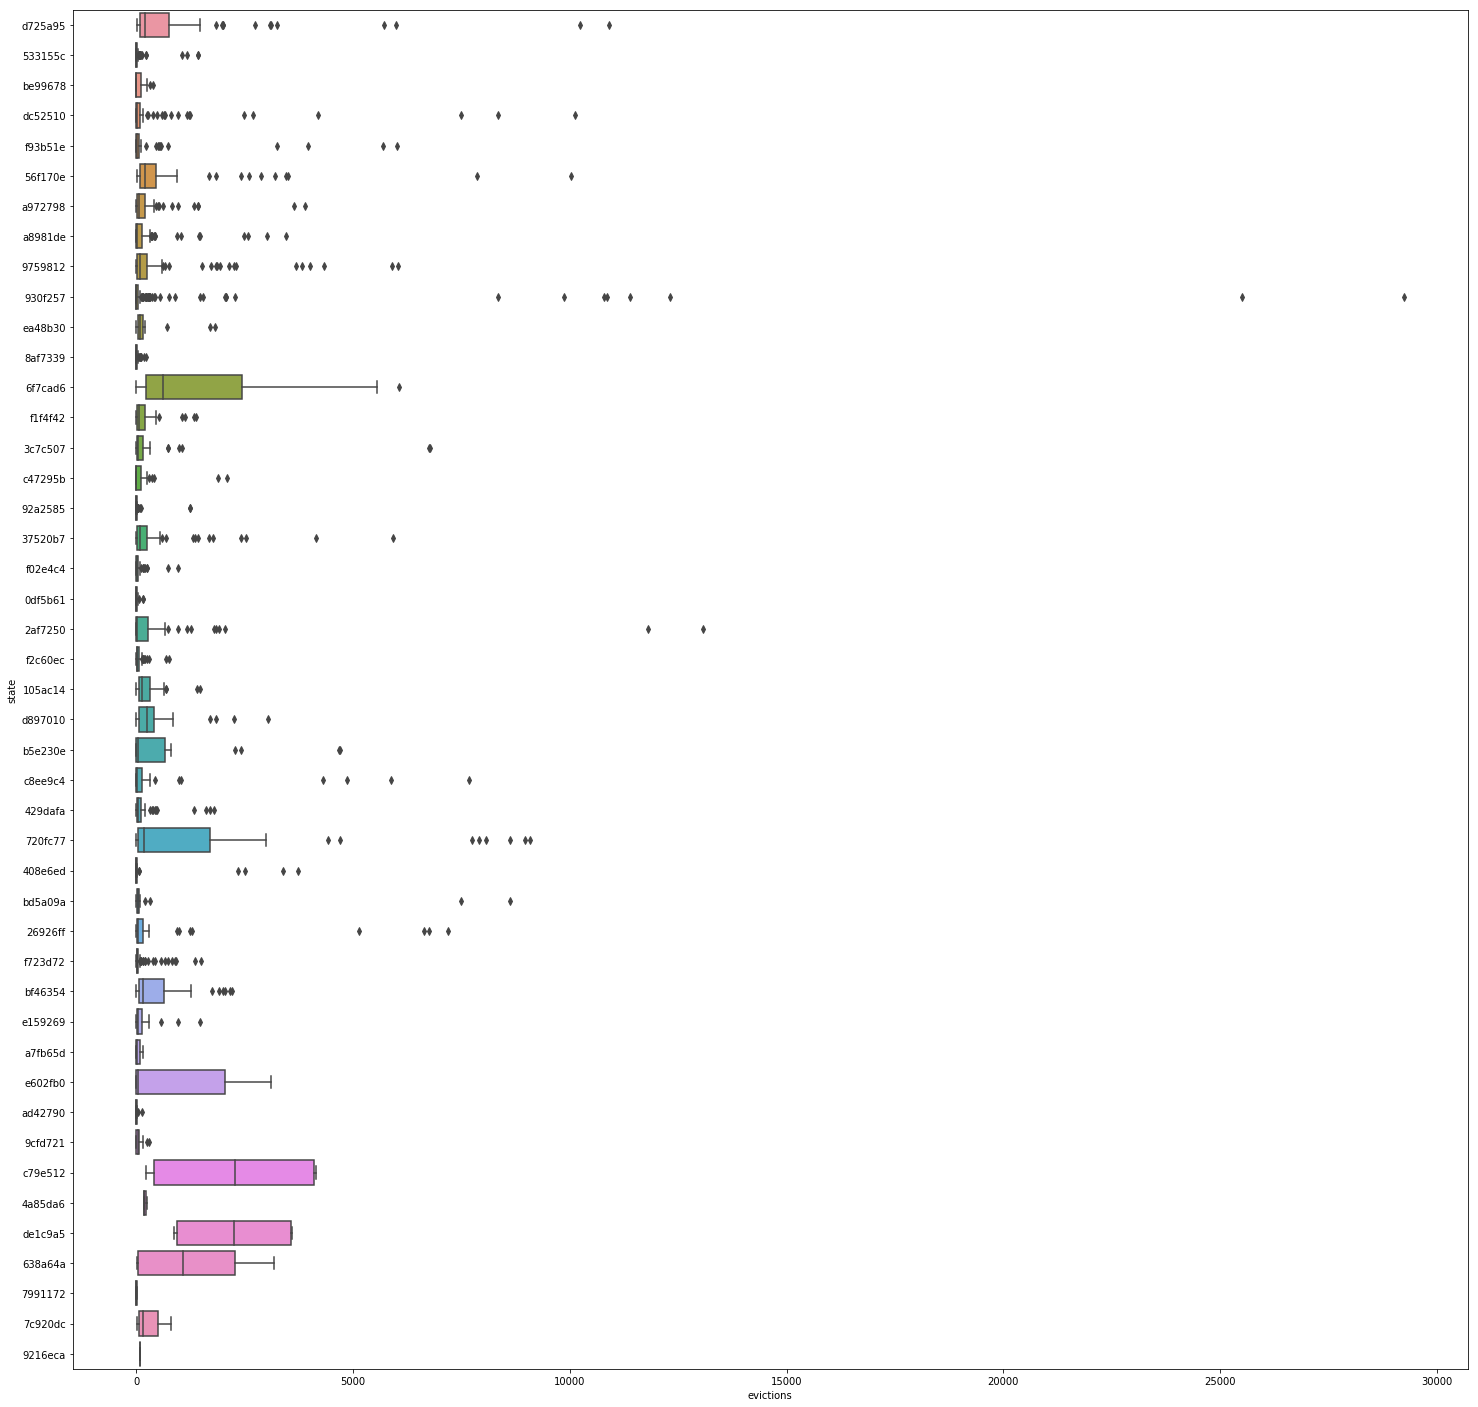

In [28]:


# boxplot evictions vs state 

# must create a figure bigger than the default to fit this large correlation matrix 
fig, ax = plt.subplots(figsize=(25,25))

# boxplot evictions vs state 
sns.boxplot(x = alldata['evictions'], y = alldata['state'], ax = ax)
plt.show()

fig = ax.get_figure()
fig.savefig('state_evictions.png')

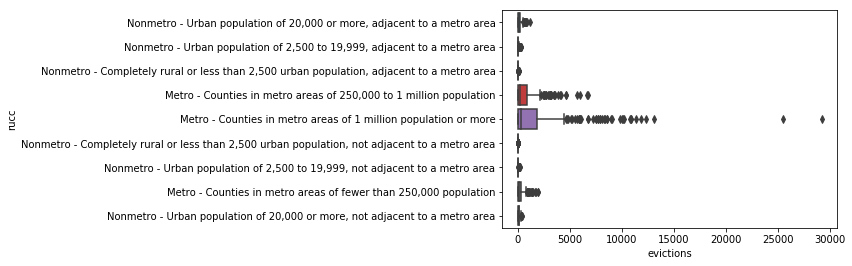

In [29]:
# boxplot - evictions vs rucc 
sns.boxplot(x = alldata['evictions'], y = alldata['rucc'])

In [30]:
print(alldata[['rucc', 'evictions']].groupby('rucc').mean().sort_values('evictions', ascending = False))

                                                    evictions
rucc                                                         
Metro - Counties in metro areas of 1 million po...    1681.54
Metro - Counties in metro areas of 250,000 to 1...     738.96
Metro - Counties in metro areas of fewer than 2...     259.48
Nonmetro - Urban population of 20,000 or more, ...     201.40
Nonmetro - Urban population of 20,000 or more, ...     127.33
Nonmetro - Urban population of 2,500 to 19,999,...      47.76
Nonmetro - Urban population of 2,500 to 19,999,...      24.43
Nonmetro - Completely rural or less than 2,500 ...      10.02
Nonmetro - Completely rural or less than 2,500 ...       4.27


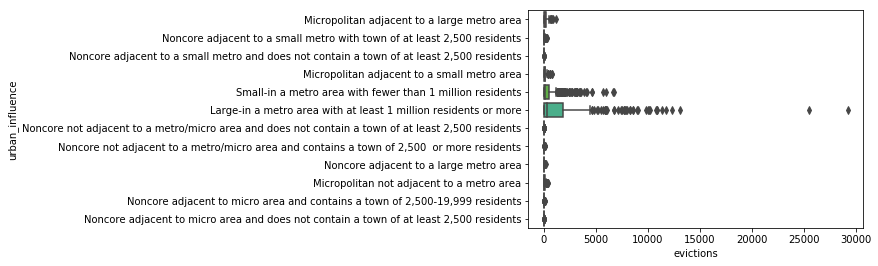

In [31]:
# boxplot - evictions vs urban_influence 
sns.boxplot(x = alldata['evictions'], y = alldata['urban_influence'])

In [32]:
print(alldata[['urban_influence', 'evictions']].groupby('urban_influence').mean().sort_values('evictions', ascending = False))

                                                    evictions
urban_influence                                              
Large-in a metro area with at least 1 million r...    1681.54
Small-in a metro area with fewer than 1 million...     511.43
Micropolitan adjacent to a large metro area            173.88
Micropolitan adjacent to a small metro area            132.22
Micropolitan not adjacent to a metro area               71.98
Noncore adjacent to a large metro area                  39.04
Noncore adjacent to a small metro with town of ...      31.59
Noncore not adjacent to a metro/micro area and ...      19.59
Noncore adjacent to micro area and contains a t...      17.26
Noncore adjacent to a small metro and does not ...       9.16
Noncore adjacent to micro area and does not con...       5.00
Noncore not adjacent to a metro/micro area and ...       4.23


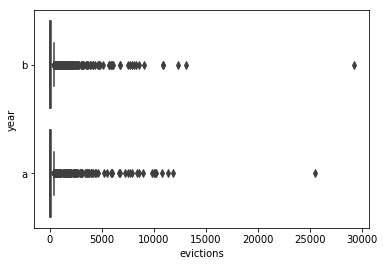

In [33]:
# boxplot - evictions vs year
sns.boxplot(x = alldata['evictions'], y = alldata['year'])

In [34]:
print(alldata[['year', 'evictions']].groupby('year').mean().sort_values('evictions', ascending = False))

      evictions
year           
b        382.77
a        373.28


In [35]:
# evictions vs county_code
#sns.boxplot(x = alldata['evictions'], y = alldata['county_code'])       

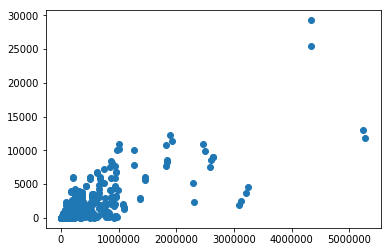

In [36]:
# plot evictions vs population 

# looks appropriate that evictions follow population trends 
plt.scatter(alldata.population, alldata.evictions)

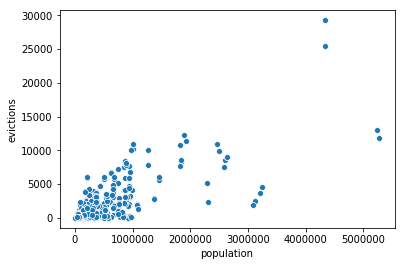

In [37]:
sns.scatterplot(alldata.population, alldata.evictions)

In [38]:
# evictions correlate with population.... 
# maybe a nice interactive visualization would be nice here

alldata[['population', 'evictions']].corr()

population  evictions
population        1.00       0.81
evictions         0.81       1.00

In [39]:
# Place holder - need interactive visualization here

In [40]:
# Interactive visualization using bokeh 
# Its pretty cool 

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# creates the bokeh plot inline in the notebook 
output_notebook()

source = ColumnDataSource(alldata)

p = figure()

p.circle(x='population', y='evictions', source=source,
         size=10, color='red', alpha=0.6)

hover_tool = HoverTool(tooltips = [('county_code','@county_code'), ('year', '@year')])

p.add_tools(hover_tool)

# make y-axis not in scientific notation 
p.below[0].formatter.use_scientific = False

show(p)


Loading BokehJS ...

In [41]:
# Challenge 1. - Data Exploration 
# Minimum Evictions 
# Max 
# Mean 
# Median - by the 50% descriptive statistic 
alldata.evictions.describe()

count    2546.00
mean      378.05
std      1405.28
min         0.00
25%         4.00
50%        29.00
75%       160.75
max     29251.00
Name: evictions, dtype: float64

In [42]:
# Median evictions 
alldata.evictions.median()

29.0

(array([2.463e+03, 4.500e+01, 2.300e+01, 1.000e+01, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2925.1,  5850.2,  8775.3, 11700.4, 14625.5, 17550.6,
        20475.7, 23400.8, 26325.9, 29251. ]),
 <a list of 10 Patch objects>)

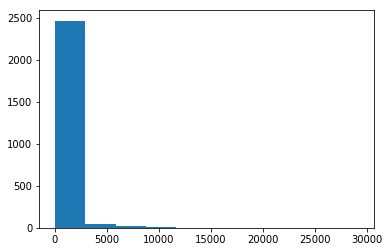

In [43]:
# histogram to view distributions of evictions data 
# matplotlib style 
plt.hist(alldata.evictions)

C:\Users\josh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


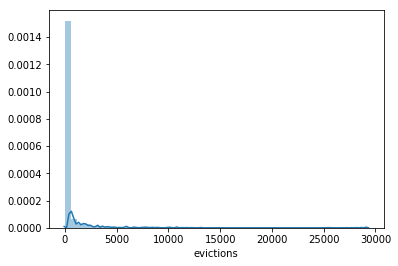

In [44]:
# histogram of eviction data 
# seaborn style 
sns.distplot(alldata.evictions)


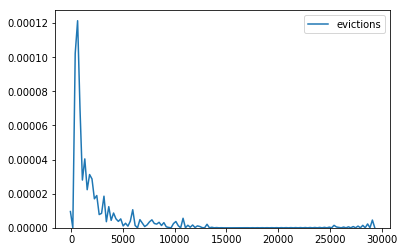

In [45]:
# kde plot of evictions 
sns.kdeplot(alldata.evictions)



In [46]:
# log transform the response variable 


         evictions
state             
0df5b61      28.81
105ac14     229.47
26926ff     400.75
2af7250     492.23
37520b7     401.62
3c7c507     312.81
408e6ed     215.16
429dafa     189.25
4a85da6     200.33
533155c      70.25
56f170e     646.26
638a64a    1274.33
6f7cad6    1507.21
720fc77    1698.57
7991172       4.88
7c920dc     305.60
8af7339      19.37
9216eca      90.00
92a2585      39.88
930f257     612.81
9759812     473.55
9cfd721      57.12
a7fb65d      50.83
a8981de     257.61
a972798     261.78
ad42790      14.56
b5e230e     683.08
bd5a09a     521.82
be99678      68.64
bf46354     508.85
c47295b     185.69
c79e512    2226.25
c8ee9c4     406.15
d725a95     829.56
d897010     481.57
dc52510     348.93
de1c9a5    2242.00
e159269     167.24
e602fb0     986.00
ea48b30     233.15
f02e4c4      58.54
f1f4f42     183.89
f2c60ec      54.46
f723d72     114.48
f93b51e     225.93
AxesSubplot(0.125,0.125;0.775x0.755)
       evictions
count      45.00
mean      452.92
std       544.39
mi

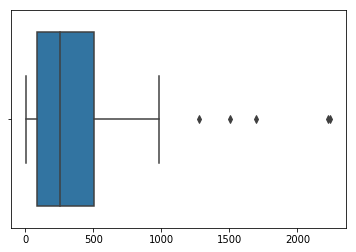

In [47]:
# Evictions across states 
print(alldata[['state', 'evictions']].groupby('state').mean())
print(sns.boxplot(alldata[['state', 'evictions']].groupby('state').mean()))
print(alldata[['state', 'evictions']].groupby('state').mean().describe())

             evictions
county_code           
0056abb          11.00
0062111          29.00
00b0dcf           8.50
00db8a1           5.50
0118d83          16.00
0138fbb           5.00
013d36b         885.00
0167a55         392.50
0179683          24.50
01b128f         293.50
01b6bd3          27.00
01e2453           6.00
02050f7           0.00
0286e15          60.50
033b659         190.00
03515c5           0.50
038cc99          71.50
03d5bbf         156.00
045453d          25.00
0454589         530.50
045b935          79.00
049bccf           0.00
04e2f91         103.50
0501c55           0.00
0563adb        2186.00
05ed241          23.00
06312dd          57.00
06641df          76.50
066a469           0.00
068a131           0.50
...                ...
fa5fdcb           0.00
fa611e7         117.00
fa9c25b           3.50
faa0d1f          97.50
faf1cd7           4.50
fafce25          73.00
fb0f65b         232.00
fb41805         259.00
fb4ab2f           4.00
fb5b35f          10.50
fba295f    

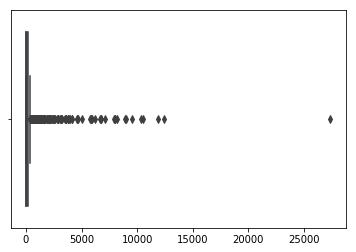

In [48]:
# Evictions across counties 
print(alldata[['county_code', 'evictions']].groupby('county_code').mean())
print(sns.boxplot(alldata[['county_code', 'evictions']].groupby('county_code').mean()))
print(alldata[['county_code', 'evictions']].groupby('county_code').mean().describe())

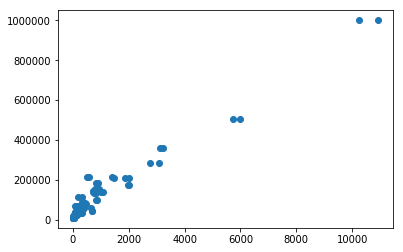

In [49]:
# For counties in state d725a95 - describe the relationship between population size and number of evictions 
# .loc to subset data and get information about only state d725a95
# alldata.loc[alldata.state == 'd725a95']

# matplotlib style 
plt.scatter(alldata.loc[alldata.state == 'd725a95'].evictions, alldata.loc[alldata.state == 'd725a95'].population)

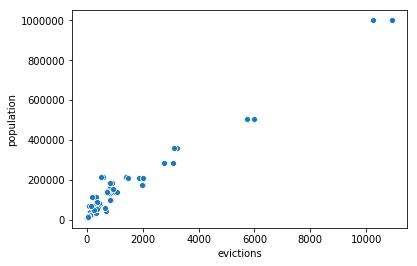

In [50]:
# seaborn style
sns.scatterplot(x = alldata.loc[alldata.state == 'd725a95'].evictions, y = alldata.loc[alldata.state == 'd725a95'].population)

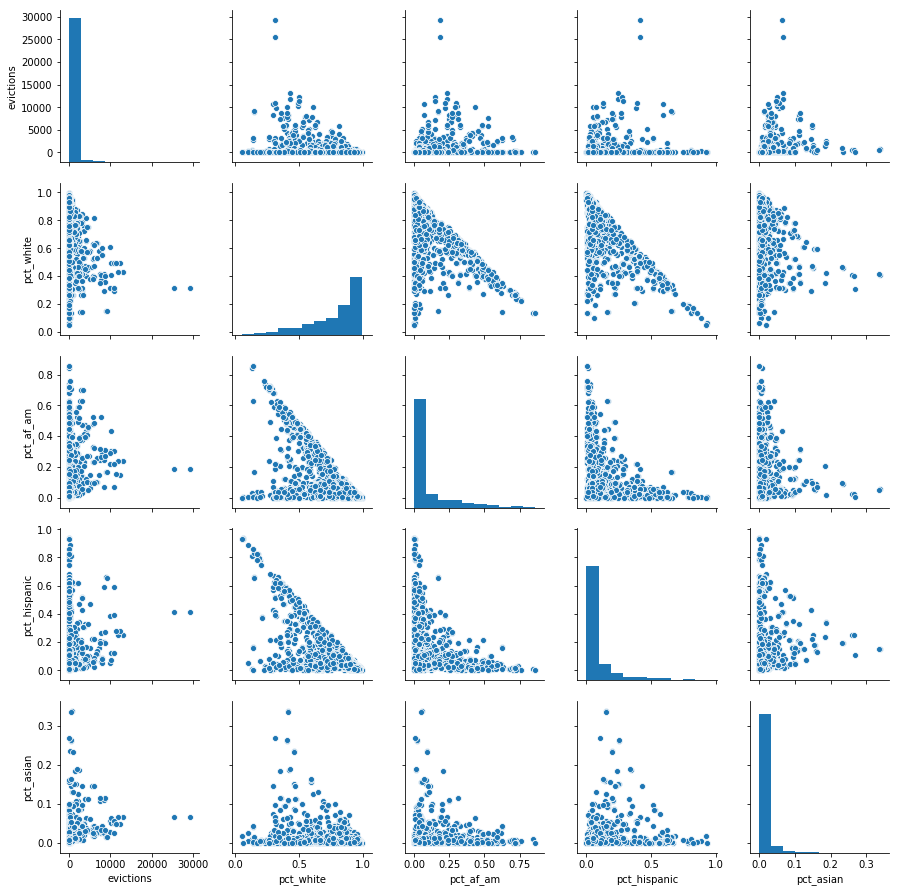

In [51]:
# Looking across counties - looking for a correlation coefficient greater than zero 
# visualization 
cols = ['evictions','pct_white', 'pct_af_am', 'pct_hispanic','pct_asian']
sns.pairplot(alldata[cols], palette = 'Set2', diag_kind = 'hist')

In [52]:
# Correlation matrix 
# corr = alldata['evictions','pct_white', 'pct_af_am', 'pct_hispanic','pct_asian'].corr()
# print(corr)

In [53]:
corr = alldata[['evictions','pct_white', 'pct_af_am', 'pct_hispanic','pct_asian']].corr()
print(corr)

# ##############
# Question - how to subset this a get just the first or column back of the correlation matrix 
################
#

              evictions  pct_white  pct_af_am  pct_hispanic  pct_asian
evictions          1.00      -0.28       0.20          0.14       0.32
pct_white         -0.28       1.00      -0.63         -0.64      -0.27
pct_af_am          0.20      -0.63       1.00         -0.11       0.04
pct_hispanic       0.14      -0.64      -0.11          1.00       0.15
pct_asian          0.32      -0.27       0.04          0.15       1.00


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

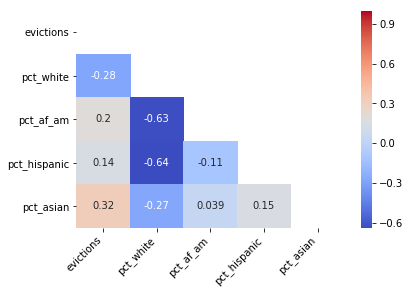

In [54]:
# Generate a mask for the upper triangle
import numpy as np
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# heatmap correlation visualization
corr = alldata[['evictions','pct_white', 'pct_af_am', 'pct_hispanic','pct_asian']].corr()
sns.heatmap(corr, cmap="coolwarm", annot = True, mask = mask)
plt.xticks(rotation=45, ha = 'right')



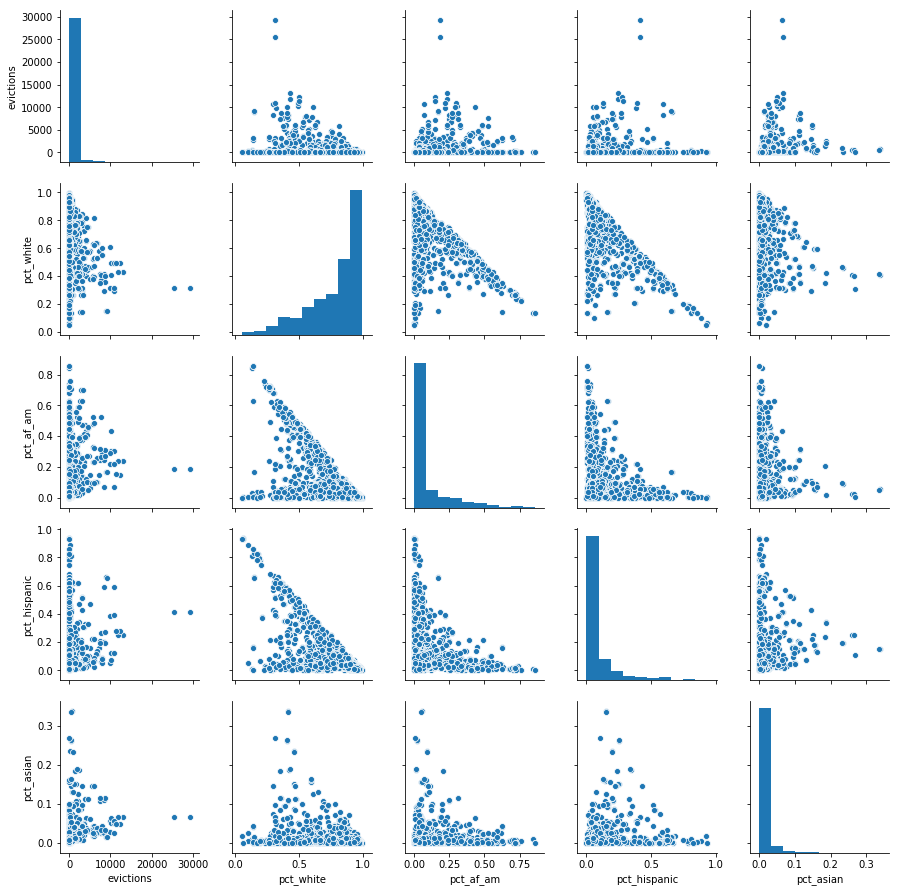

In [55]:
sns.pairplot(alldata[['evictions','pct_white', 'pct_af_am', 'pct_hispanic','pct_asian']])

In [56]:
alldata.columns

Index(['row_id', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'economic_typology', 'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_sc

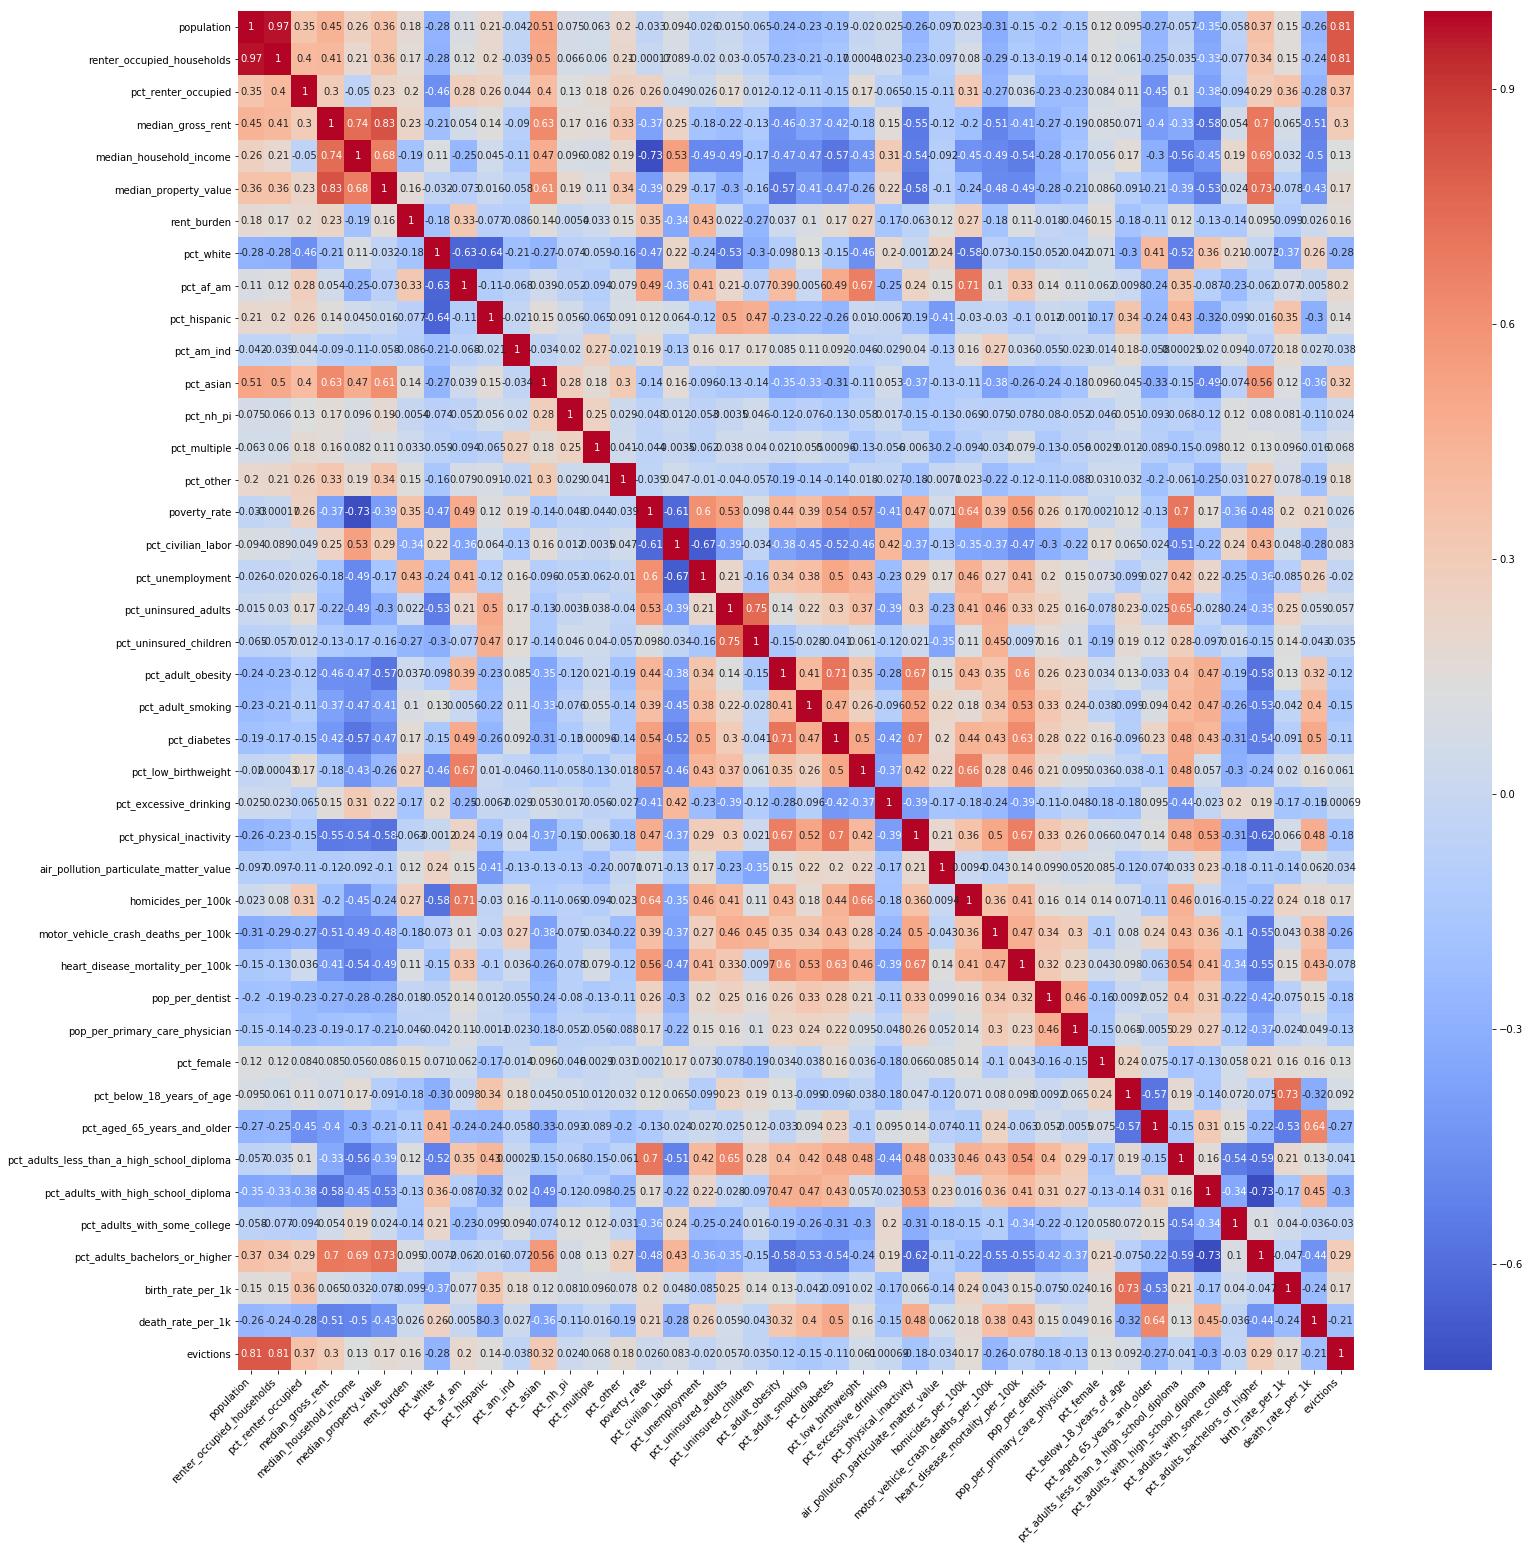

In [57]:
# Generate a mask for the upper triangle
import numpy as np
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cols = ['population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'pct_civilian_labor',
       'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children',
       'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
       'pct_low_birthweight', 'pct_excessive_drinking',
       'pct_physical_inactivity', 'air_pollution_particulate_matter_value',
       'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k',
       'heart_disease_mortality_per_100k', 'pop_per_dentist',
       'pop_per_primary_care_physician', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions']
    
corr2 = alldata[cols].corr()

# must create a figure bigger than the default to fit this large correlation matrix 
fig, ax = plt.subplots(figsize=(25,25))

# now create the actual figure
sns.heatmap(corr2, cmap="coolwarm", annot = True, ax = ax)
plt.xticks(rotation=45, ha = 'right')
plt.show()


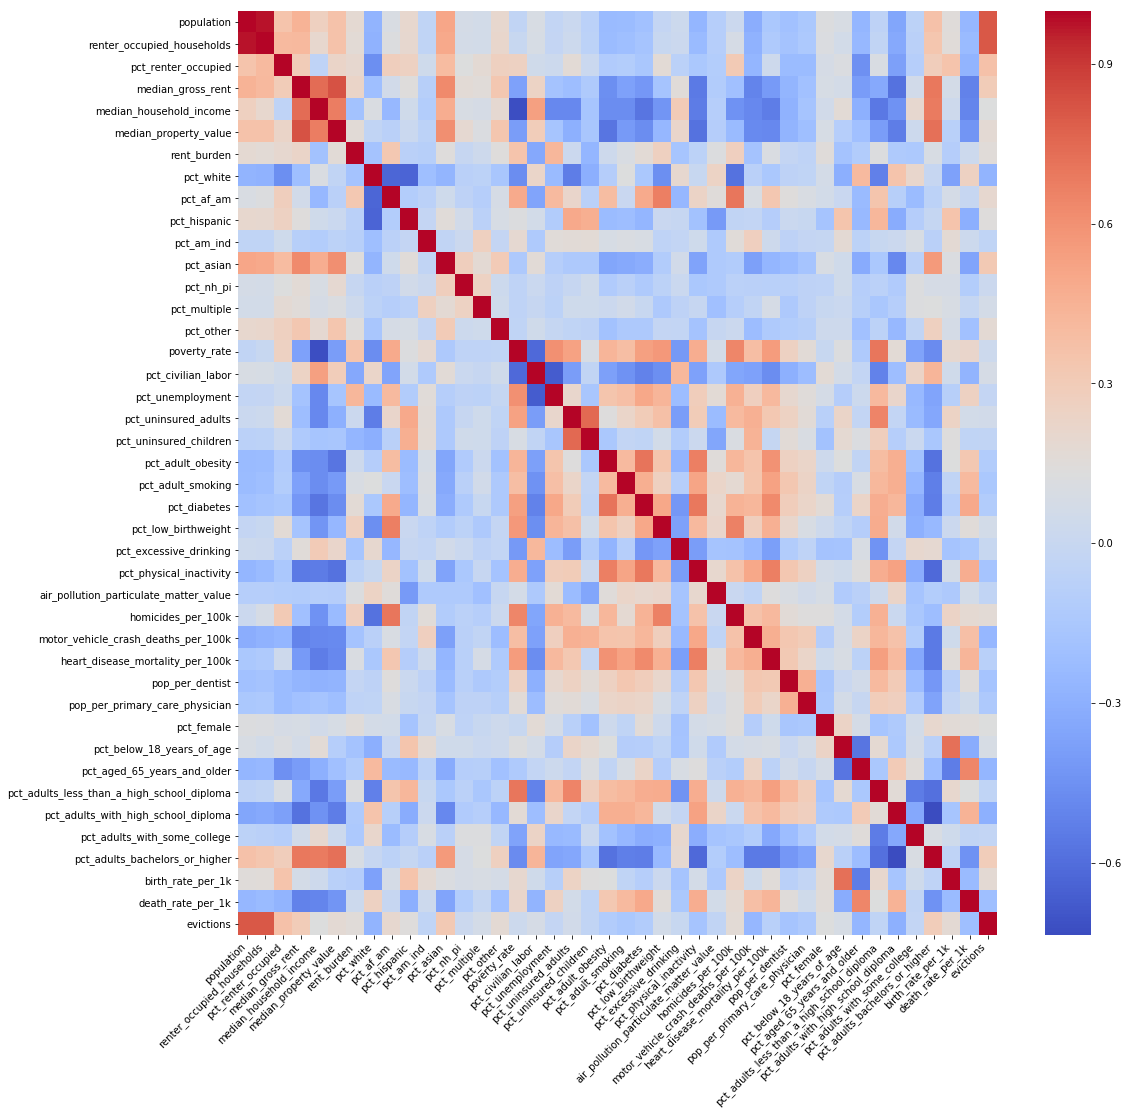

In [58]:
# same figure as above without annotation 

fig, ax = plt.subplots(figsize=(17,17))

# now create the actual figure
sns.heatmap(corr2, cmap="coolwarm", ax = ax)
plt.xticks(rotation=45, ha = 'right')
plt.show()


In [59]:
alldata.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                   

In [60]:
# Change in evictions across years 

In [61]:
# Looking just at states de1c9a5 and e602fb0

In [62]:
# how to pull out just the grouped data 

In [63]:
# groupby, describe, and subset by specific states 
alldata[['year', 'state', 'evictions']].groupby(['state','year']).describe().loc[['de1c9a5', 'e602fb0']]

evictions                                                       
                 count    mean     std    min     25%     50%     75%     max
state   year                                                                 
de1c9a5 a         2.00 2225.00 1919.09 868.00 1546.50 2225.00 2903.50 3582.00
        b         2.00 2259.00 1845.55 954.00 1606.50 2259.00 2911.50 3564.00
e602fb0 a         2.00 1557.00 2196.27   4.00  780.50 1557.00 2333.50 3110.00
        b         4.00  700.50 1336.35   1.00    3.25   48.50  745.75 2704.00

In [64]:
# groupby output in a slightly different formant using .transpose()
alldata[['year', 'state', 'evictions']].groupby(['state','year']).describe().loc[['de1c9a5', 'e602fb0']].transpose()

state           de1c9a5         e602fb0        
year                  a       b       a       b
evictions count    2.00    2.00    2.00    4.00
          mean  2225.00 2259.00 1557.00  700.50
          std   1919.09 1845.55 2196.27 1336.35
          min    868.00  954.00    4.00    1.00
          25%   1546.50 1606.50  780.50    3.25
          50%   2225.00 2259.00 1557.00   48.50
          75%   2903.50 2911.50 2333.50  745.75
          max   3582.00 3564.00 3110.00 2704.00

In [65]:
# the access data nested inside the group by we can call .loc .loc 
# maybe not totally useful.. 
alldata[['year', 'state', 'evictions']].groupby(['state','year']).describe().loc[['de1c9a5', 'e602fb0']].loc['de1c9a5', 'a']

evictions  count      2.00
           mean    2225.00
           std     1919.09
           min      868.00
           25%     1546.50
           50%     2225.00
           75%     2903.50
           max     3582.00
Name: (de1c9a5, a), dtype: float64

In [66]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).describe().loc[['de1c9a5', 'e602fb0']]

evictions                                                       
                 count    mean     std    min     25%     50%     75%     max
state   year                                                                 
de1c9a5 a         2.00 2225.00 1919.09 868.00 1546.50 2225.00 2903.50 3582.00
        b         2.00 2259.00 1845.55 954.00 1606.50 2259.00 2911.50 3564.00
e602fb0 a         2.00 1557.00 2196.27   4.00  780.50 1557.00 2333.50 3110.00
        b         4.00  700.50 1336.35   1.00    3.25   48.50  745.75 2704.00

In [67]:
# .xs - cross section allows you to access the groupby in a different manner 
alldata[['year', 'state', 'evictions']].groupby(['state','year']).describe().loc[['de1c9a5', 'e602fb0']].xs('a',level = 'year')

evictions                                                       
            count    mean     std    min     25%     50%     75%     max
state                                                                   
de1c9a5      2.00 2225.00 1919.09 868.00 1546.50 2225.00 2903.50 3582.00
e602fb0      2.00 1557.00 2196.27   4.00  780.50 1557.00 2333.50 3110.00

In [68]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean()

evictions
state   year           
0df5b61 a         26.88
        b         30.75
105ac14 a        229.91
        b        229.03
26926ff a        419.89
        b        381.61
2af7250 a        465.56
        b        518.91
37520b7 a        323.15
        b        478.12
3c7c507 a        310.03
        b        315.60
408e6ed a        207.00
        b        223.31
429dafa a        198.83
        b        179.67
4a85da6 a        214.50
        b        172.00
533155c a         67.83
        b         72.67
56f170e a        655.41
        b        637.11
638a64a a       1303.00
        b       1245.67
6f7cad6 a       1522.06
        b       1494.00
720fc77 a       1740.78
        b       1656.35
7991172 a          5.25
        b          4.50
...                 ...
c47295b a        166.19
        b        205.19
c79e512 a       1588.00
        b       4141.00
c8ee9c4 a        430.19
        b        381.43
d725a95 a        822.06
        b        837.06
d897010 a        133.13
        b        830.00
dc52510 a        381.19
        b        316.19
de1c9a5 a       2225.00
        b       2259.00
e159269 a        204.53
        b        127.29
e602fb0 a       1557.00
        b        700.50
ea48b30 a        259.46
        b        206.85
f02e4c4 a         45.39
        b         71.69
f1f4f42 a        178.26
        b        189.70
f2c60ec a         57.84
        b         51.22
f723d72 a        116.94
        b        112.02
f93b51e a        247.40
        b        206.67

[89 rows x 1 columns]

In [69]:
# Looking just at states de1c9a5 and e602fb0, which of the following statements is true?
alldata[['year', 'state', 'evictions']].groupby(['state','year']).describe().loc[['de1c9a5', 'e602fb0']]


evictions                                                       
                 count    mean     std    min     25%     50%     75%     max
state   year                                                                 
de1c9a5 a         2.00 2225.00 1919.09 868.00 1546.50 2225.00 2903.50 3582.00
        b         2.00 2259.00 1845.55 954.00 1606.50 2259.00 2911.50 3564.00
e602fb0 a         2.00 1557.00 2196.27   4.00  780.50 1557.00 2333.50 3110.00
        b         4.00  700.50 1336.35   1.00    3.25   48.50  745.75 2704.00

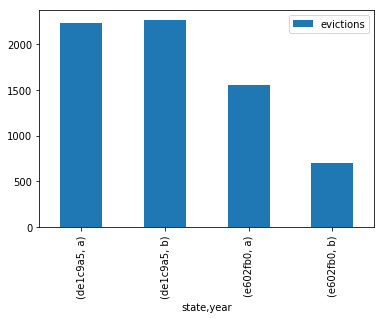

In [70]:
################################
# I want the hue to be year a and b 
################################
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']].plot.bar()

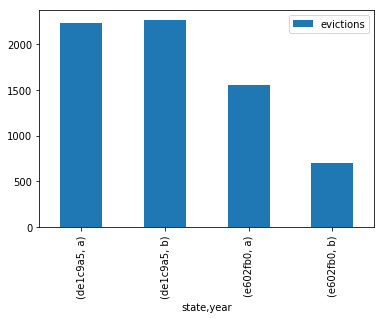

In [71]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']].plot.bar()

In [72]:
print(alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']])
print(alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']].unstack())

              evictions
state   year           
de1c9a5 a       2225.00
        b       2259.00
e602fb0 a       1557.00
        b        700.50
        evictions        
year            a       b
state                    
de1c9a5   2225.00 2259.00
e602fb0   1557.00  700.50


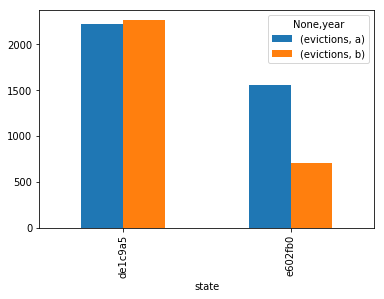

In [73]:
# unstack method 
# unstack - pivots the table to have a single row index and expand out the column index 
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']].unstack().plot.bar()

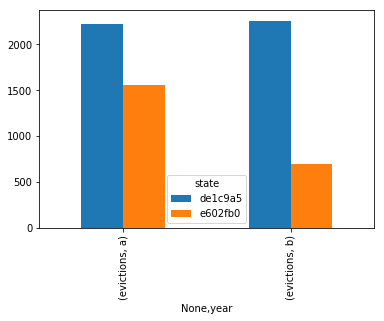

In [74]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']].unstack().transpose().plot.bar()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

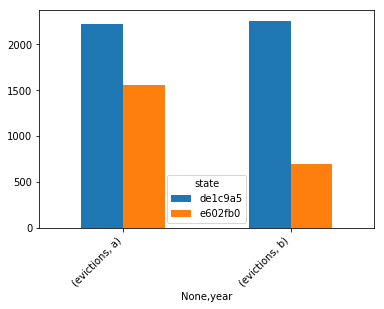

In [75]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']].unstack().transpose().plot(kind = 'bar')
plt.xticks(rotation = 45, ha = 'right')


In [76]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']]

evictions
state   year           
de1c9a5 a       2225.00
        b       2259.00
e602fb0 a       1557.00
        b        700.50

In [77]:
alldata[['year', 'state', 'evictions']].groupby(['state','year']).mean().loc[['de1c9a5', 'e602fb0']]

evictions
state   year           
de1c9a5 a       2225.00
        b       2259.00
e602fb0 a       1557.00
        b        700.50

In [78]:
print(alldata.loc[(alldata.state == 'de1c9a5') & (alldata.state == 'e602fb0')].evictions)

Series([], Name: evictions, dtype: int64)


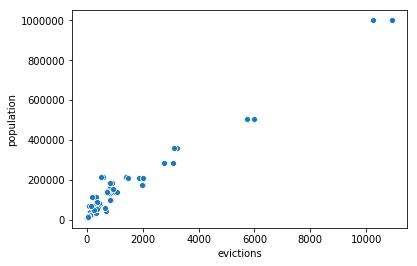

In [79]:
sns.scatterplot(x = alldata.loc[alldata.state == 'd725a95'].evictions, y = alldata.loc[alldata.state == 'd725a95'].population)

In [80]:
# Machine Learning Challenge 

# Consider how poverty, income, health, ethnicity, and other sociodemographic factors 
# related to evictions, and to use your skills to build a model for predicting 
# eviction levels in counties across the United States.

In [81]:
# This is a Regressioj problem. We are predicting regression levels. 
# Follow MPP module 4 Applying Linear Regression 
# dataset loaded as alldata

In [82]:
# shape of data 
print(alldata.shape)
print(alldata.dtypes)

(2546, 49)
row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other        

In [83]:
# prepare categorical variables and get_dummies for object types 
# pandas call to get dummy variables
# dummies act as a flag of either yes or this occurs for the specific record
# too many dummy variables can cause over fitting. 
# must check that dummy coding makes sense
# check value for categorical features to see if dummy coding will add 
# valuable information for in the model or cause to overfit 


# Our categorical features
# county_code                                    
# year                                           
# state 
# rucc                                           
# urban_influence                                
# economic_typology                              

In [84]:
# county_code

# The whole regression project is to predict eviciton levels by county 
# I'm guessing this will add too many features if dummy coded 
##### Decision to drop county_code from learning model 
alldata.county_code.value_counts()
alldata.county_code.nunique()
alldata.shape

(2546, 49)

In [85]:
#_year 

alldata.year.value_counts()

#### Decision - exploratory analysis revealed there was a difference in eviciton rates based on year
#               we examined 2 counties on a year over year comparision and there was a difference
#               We will dummy code year 

alldata = pd.concat([alldata, (pd.get_dummies(alldata['year'], prefix = 'dummies', drop_first = True))], axis = 1)
                     


In [86]:
# state 

alldata.state.nunique()
# dummy coding state will result in a lot of added features 
##### Decision - drop state from learning model 


45

In [87]:
# rucc - rural urban continuum codes 
#       three metro and six non-metro categories 
#### Decision - probably some predictive power here and only 9 categories thus add dummies 

alldata.rucc.value_counts()

alldata = pd.concat([alldata, (pd.get_dummies(alldata['rucc'], prefix = 'dummies', drop_first = True))], axis = 1)

In [88]:
# urban_influence 

# urban_influence and rucc at a quick glance seem to be encoding the same informaiton, thus drop urban_influence 
#### Decision - drop urban_influence from learning model 

alldata.urban_influence.value_counts()

Small-in a metro area with fewer than 1 million residents                                             550
Large-in a metro area with at least 1 million residents or more                                       358
Noncore adjacent to a small metro with town of at least 2,500 residents                               270
Micropolitan adjacent to a small metro area                                                           201
Micropolitan not adjacent to a metro area                                                             197
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          174
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    162
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                158
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             146
Noncore adjacent to a large metro area        

In [89]:
# economic_typology 

# contaings 6 discrete categories that may have predictive power 
#### Decision - dummy code  

alldata.economic_typology.value_counts()

alldata = pd.concat([alldata, (pd.get_dummies(alldata['economic_typology'], prefix = 'dummies', drop_first = True))], axis = 1)


In [90]:
# drop all categorical features and row_id 
#'row_id', 'county_code', 'year', 'state'
#'rucc', 'urban_influence', 'economic_typology'

alldata.drop(columns = ['row_id', 'county_code', 
                       'year', 'state',
                       'rucc', 'urban_influence', 
                       'economic_typology'], 
                       inplace = True)




In [91]:
alldata.shape

(2546, 56)

In [92]:
# Look for null values and make decions
# 1. remove columns with too many null 
# 2. replace with mean/median 
# 3. input null with regression 

(alldata.isnull().sum()/(len(alldata)))*100

#### Decision - after reviewing the correlation matrix created in the exploratory 
#               analysis none of the features missing data have a correlation of higher than 0.17 
#               Thus, we will drop all feature with missing data 
#               Information on why there were missing value not available 

# Exercise - if we wanted to replace missing values with the mean - see example code 
# x.Age.fillna(x.Age.mean(), inplace = True )

alldata = alldata.dropna(axis = 'columns')

In [93]:
# split our date frame into features and labels 
labels = alldata['evictions']

In [94]:
train_data = alldata
train_data = train_data.drop(['evictions'], axis = 1)

In [95]:
# now we have train_data and labels. 

In [96]:
########################################
# Do we scale our dummy variables?
# Will create the model with all values scaled and see how it preforms 

# from sklearn import preprocessing

# scale = preprocessing.StandardScaler()
# scale.fit(train_data)
# train_data = scale.transform(train_data)
########################################

# # r2 0.72 without scaling varibles - was a lucky sample 
# # r2 0.51 with scaling all variables 
# # r2 0.64 with scaling just the numerical variable 
# # r2 0.59 with cross validation
# Lets try scaling only the numerical variables and not of the dummy variables 

from sklearn import preprocessing

cols = ['population', 'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'rent_burden', 'pct_white', 'pct_af_am',
       'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',
       'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
       'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity',
       'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions']
scale = preprocessing.StandardScaler()
scale.fit(alldata[cols])
alldata[cols] = scale.fit_transform(alldata[cols])
# #

C:\Users\josh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\josh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\josh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [97]:
# only transform the non-encoded features 

cols = ['population', 'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'rent_burden', 'pct_white', 'pct_af_am',
       'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',
       'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
       'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity',
       'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions']


# from sklearn import preprocessing

# scale = preprocessing.StandardScaler()
# scale.fit(alldata2[cols])
# alldata2[cols] = scale.fit_transform(alldata2[cols])

In [98]:
# lets try making the model with train_test_split the circle back 
# and do it with cross_validation 
# still understanding the conceptual nature of model building here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size = 0.3)

In [99]:
# Build linear regression model 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
# model is now trained and called lr 
# time to test the model 

from sklearn.metrics import r2_score

y_prediction = lm.predict(X_test)
r2_score(y_test, y_prediction)

# note linear regression model score by default is r2 

0.720024783872059

In [101]:
# dud

# Learning k-fold cross_validation 

# convert all datatypes to single type for sklearn.model_selection 
# import numpy as np

# train_data = train_data.astype(np.float64)
# labels = labels.astype(np.float64)



# import sklearn.model_selection as ms

# scores = ms.cross_validate(lm, train_data, labels, scoring = 'accuracy',
#                          cv=10)

In [102]:
# Cross_validation - kfolds 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, train_data, labels, cv=10)
scores 

array([0.78174362, 0.63035801, 0.63934767, 0.51936715, 0.74322643,
       0.69511501, 0.71561433, 0.36137733, 0.40437161, 0.80614142])

In [103]:
# get the mean model score
scores.mean()

0.6296662563506688

In [104]:
# Cross_validation r2 is 0.59 
# The r2 is lacking - we need to run through feature selection 


In [105]:
#Feature Selection 
# 1. eliminate zero variance and low variance features 

from sklearn import feature_selection as fs
# set variance threshold at 0.8 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
train_data_feature_selected = sel.fit_transform(train_data)

# get_support - shows the true or false which features will be included 
print(train_data.shape)
print(sel.get_support())
print(train_data_feature_selected.shape)



(2546, 45)
[ True  True  True  True  True False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False  True  True  True False False False False
 False False False False False False False  True False]
(2546, 11)


In [106]:
# Feature selection 
# Method of adding each feature to the model to see if it improves the model ## Set folds for nested cross validation


import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection as fs


feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
lm = LinearRegression()

## Perform feature selection by CV with high variance features only

selector = fs.RFECV(estimator = lm, cv = feature_folds)
selector = selector.fit(train_data_feature_selected, labels)
selector.support_ 

# Feature selection greedy algorithm way shows all features have predictive power 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [107]:


# See which features have the most predictive power 
selector.ranking_

# Features with a ranking of 1 are kept and deemed as important 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
# reduce our features with selector.transform

train_data_feature_selected_reduced = selector.transform(train_data_feature_selected)
train_data_feature_selected_reduced.shape

(2546, 11)

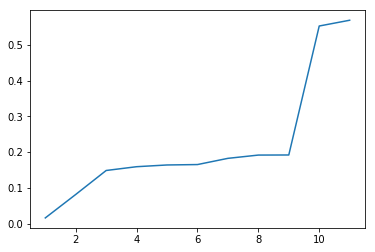

In [109]:
# The code in the cell below creates a plot of AUC (the metric) vs. the number of features. Execute this code. 

plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)

In [110]:
# train model with our reduced feature set 

# follow the cross_valiation methos for model training 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, train_data_feature_selected_reduced, labels, cv=10, scoring = 'r2')
scores 

array([0.77709718, 0.52712203, 0.54534539, 0.5095582 , 0.72171045,
       0.68587342, 0.69477283, 0.16270523, 0.31470074, 0.84419316])

In [111]:
LinearRegression

sklearn.linear_model.base.LinearRegression

In [112]:
# wow the model got even worse after feature selection 
# and feature reduction

#need some feature engineering 

scores.mean()

0.5783078620445103

In [113]:
# get the predictions 
# need to visualize actual vs predicted to see how 
# linear or non-linear our model is

In [114]:
#### need to fix evictions 
#### its gettting scaled in standard scaler and its messing up the model 
#### addtionally, the response of evictions is not normally distributed 
#### thus the response variable may need to be log transformed. 

In [115]:
# Try transforming the response variable evitions and re-run the model for better r2 
# transforming labels didn't help, actually made the model worse 

(array([2.463e+03, 4.500e+01, 2.300e+01, 1.000e+01, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2925.1,  5850.2,  8775.3, 11700.4, 14625.5, 17550.6,
        20475.7, 23400.8, 26325.9, 29251. ]),
 <a list of 10 Patch objects>)

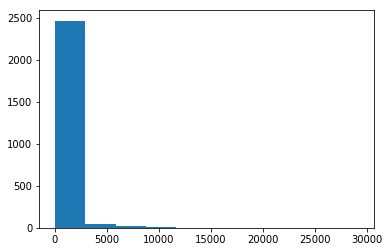

In [116]:
plt.hist(labels)

In [117]:
labels_transformed = np.log(labels)
labels_transformed[labels_transformed == -np.inf] = 0

C:\Users\josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(array([522., 260., 362., 391., 406., 289., 147., 109.,  51.,   9.]),
 array([ 0.        ,  1.0283669 ,  2.05673381,  3.08510071,  4.11346762,
         5.14183452,  6.17020142,  7.19856833,  8.22693523,  9.25530214,
        10.28366904]),
 <a list of 10 Patch objects>)

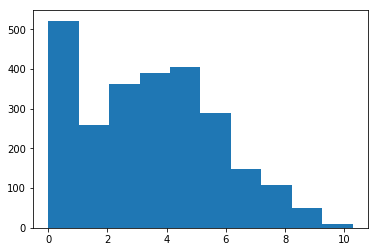

In [118]:
plt.hist(labels_transformed)

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, train_data_feature_selected_reduced, labels_transformed, cv=10)
scores 

array([0.493547  , 0.52768813, 0.43945063, 0.46218309, 0.56425534,
       0.4530137 , 0.5201217 , 0.32212237, 0.42808578, 0.40046395])

In [120]:
#this exercise doesn't really function - gives bad results 

#Custom model - manual feature selection 
# labels have already been normalized at this point 
col = ['population', 'pct_renter_occupied','median_gross_rent', 'pct_white',
       'pct_am_ind', 'pct_asian', 'pct_aged_65_years_and_older',
       'pct_adults_bachelors_or_higher']
manual_features = alldata[col]
# dummy code county_code 
#cc = evict.county_code

# dummy code rucc - ordinal fashion 
evict['rucc_feature_engineering'] = evict.rucc.map({'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':0,
                                         'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area':0,
                                         'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area':0,
                                         'Metro - Counties in metro areas of fewer than 250,000 population':0,
                                         'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area':0,
                                         'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area':0,
                                         'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area':0,
                                         'Metro - Counties in metro areas of 250,000 to 1 million population':1, 
                                         'Metro - Counties in metro areas of 1 million population or more':2})

# concatenate


# concatenate manual_featues and cc 
#manual_features = pd.concat([manual_features,(pd.get_dummies(cc, prefix = 'dummies', drop_first = True))], axis =1)

In [121]:
manual_features

population  pct_renter_occupied  median_gross_rent  pct_white  \
0          -0.19                 1.14              -0.25      -1.81   
1          -0.30                 0.46              -0.94       0.31   
2          -0.27                -0.78              -0.10       0.48   
3           0.09                 1.09              -0.47      -2.55   
4          -0.31                -1.33              -0.11       0.74   
5           2.72                 2.57               1.70      -1.85   
6          -0.27                 0.29              -0.91       0.88   
7           0.24                -1.22               1.44       0.47   
8          -0.18                -0.65              -0.08       0.54   
9          -0.24                -0.81              -0.39      -0.78   
10         -0.26                -0.75              -1.02       0.96   
11         -0.32                -0.29              -0.39      -0.87   
12         -0.33                -0.46               0.71      -1.25   
13         -0.25                -0.56              -0.42      -0.62   
14          0.16                -0.00               1.18      -0.68   
15         -0.31                 0.78              -1.03      -2.22   
16         -0.09                 1.17              -0.08      -0.49   
17         -0.30                 1.01              -0.51       0.70   
18          0.10                 1.49               3.90      -1.15   
19         -0.04                -0.36               0.99       0.46   
20         -0.19                 0.20              -0.58       0.51   
21         -0.26                 0.02               0.46      -0.52   
22         -0.24                -0.67              -0.06       0.92   
23         -0.24                 0.47              -0.35      -0.33   
24         -0.22                -1.00              -0.58       0.76   
25         -0.20                -0.53              -0.40       0.49   
26         -0.29                 0.01              -0.58      -1.98   
27         -0.31                 0.29              -1.24      -0.42   
28         -0.30                -0.96              -0.61       1.01   
29         -0.31                -1.10              -0.31       0.63   
...          ...                  ...                ...        ...   
2516       -0.29                -0.67              -0.91      -1.34   
2517       -0.27                -0.46              -0.20      -0.50   
2518       -0.29                 1.66              -1.02      -2.28   
2519       -0.31                 1.10              -0.45      -0.54   
2520       -0.29                 1.11              -1.04       0.24   
2521       -0.29                 1.28              -0.71      -2.17   
2522       -0.25                -0.26              -0.52      -2.81   
2523       -0.30                -0.40              -0.12      -0.74   
2524       -0.18                -0.96              -0.32       0.97   
2525        0.13                 0.16               0.60       0.52   
2526       -0.30                -1.49              -0.84       1.00   
2527       -0.05                -0.54               0.93       0.75   
2528       -0.12                 0.09               0.57       0.43   
2529       -0.33                -0.67              -1.07       0.84   
2530        4.21                 2.06               1.88      -1.53   
2531       -0.32                -0.29              -1.03       0.91   
2532       -0.33                -0.32               0.33       0.85   
2533       -0.29                 1.37              -0.80      -0.75   
2534       -0.31                -1.02              -0.27      -2.99   
2535       -0.31                -1.18              -1.12       0.94   
2536       -0.27                -0.14               0.45      -0.21   
2537       -0.31                 0.74              -0.14      -0.07   
2538       -0.28                -0.07              -0.85       0.60   
2539       -0.20                 0.64              -0.70       0.86   
2540       -0.31              

In [122]:
# note - lots of counties thus we may want to dummy code state to reduce the number of features 

# custom model - hand selected features based on correlation matrix 

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, manual_features, labels, cv=10)
scores


array([0.7957865 , 0.59263582, 0.56629678, 0.51075842, 0.7171154 ,
       0.69515736, 0.71135737, 0.25051172, 0.40574154, 0.84377334])

In [123]:
#create and encode female feature
# nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})
# titanic['Female'] = titanic.Sex.map({'male':0, 'female':1})

In [124]:
# need to dummy code rucc 
# use a dictionary to ordinally code rucc 
# according to the histograms rucc is a skewed in the larger metropolitan areas 
# encode this information in a ordinal fashion
# many need to give more weight to the larger metor areaas 
evict.rucc.value_counts()



Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         466
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    370
Metro - Counties in metro areas of 1 million population or more                                  358
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     337
Metro - Counties in metro areas of 250,000 to 1 million population                               289
Metro - Counties in metro areas of fewer than 250,000 population                                 261
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        210
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          170
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       85
Name: rucc, dtype: int64

In [125]:
############
############
col = ['population', 'pct_renter_occupied','median_gross_rent', 'pct_white',
        'pct_am_ind', 'pct_asian', 'pct_aged_65_years_and_older',
        'pct_adults_bachelors_or_higher', 'rucc_feature_engineering']


test_data_set = evict[col]

# scale inputs to prevent large values from dominating the model 
# from sklearn import preprocessing

scale = preprocessing.StandardScaler()
scale.fit(test_data_set)
test_data_set = scale.transform(test_data_set)

evict['rucc_feature_engineering'] = evict.rucc.map({'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':0,
                                         'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area':0,
                                         'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area':0,
                                         'Metro - Counties in metro areas of fewer than 250,000 population':0,
                                         'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area':0,
                                         'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area':0,
                                         'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area':0,
                                         'Metro - Counties in metro areas of 250,000 to 1 million population':1, 
                                         'Metro - Counties in metro areas of 1 million population or more':3})

tt = evict['rucc_feature_engineering']
tt = pd.DataFrame(tt)
test_data_set = pd.DataFrame(test_data_set)

test_data_set = pd.concat([test_data_set, tt], axis = 1)


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, test_data_set, labels, cv=10)
scores

############

C:\Users\josh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([0.79734186, 0.59723509, 0.58862775, 0.53421945, 0.71649869,
       0.70744734, 0.70805222, 0.27912988, 0.42224669, 0.84350559])

In [126]:
scores.mean()

0.6194304560391597

In [127]:
scores.mean()

0.6194304560391597

In [128]:
# load test dataset 
testing_data = pd.read_csv('C:/Users/josh/Desktop/python_datasets/test_values_capstone.csv')

In [129]:
# Note: why use highly negatively correlated features in a model 

In [130]:
# Module 5 feature selection - 
# Hyperparameter tuning 